<center><h1 style="font-size:2em;color:#2467C0"><h1 style="font-size:2em;color:#2467C0">Criação de modelo de ML e Tuning</h1>

## Objetivo deste estudo: 

* O intuito deste notebook é apresentar de forma clara e sucinta a criação e avaliação de modelos de Machine Learning orientados aos dados.

## Importar bibliotecas
<br> Começaremos importando as bibliotecas Python que usaremos nesta análise. Essas bibliotecas incluem:
<ul>
<li> <b> pandas </b> e <b> numpy </b> para ingestão e manipulação de dados. </li>
<li> <b> matplotlib </b> e <b> seaborn </b> para visualização de dados </li>
<li> <b> Sklearn </b> que contém funções para execução das metricas, modelo e tuning </li>

</ul>

In [1]:
# Bibliotecas para criação e manipulação de DATAFRAMES e Algebra 
import pandas as pd 
import numpy as np

# Bibliotecas para geração de gráficos
import matplotlib.pyplot as plt 
import seaborn as sns

# Bibliotecas para execução da estratificação dos dados e tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Bibliotecas para execução da redução de dimensionalidade
from sklearn.preprocessing import MinMaxScaler

# Bibliotecas para execução dos modelos
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas para execução das metricas
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

* Função para plotar feature importance

In [2]:
# Função para plotar gráfico feature importance
def plot_feature_importance(model):
    tmp=pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp=tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (10,18))
    plt.title('Features importance',fontsize=20)
    s=sns.barplot(y='Feature',x='Feature importance',data=tmp)
    s.set_yticklabels(s.get_yticklabels(),rotation=360)
    plt.show()

* Função para plotar ROC curve

In [3]:
# ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

* Carregando os dados .csv

* Agora, precisaremos ler o conjunto de dados usando os comandos abaixo.

In [4]:
# Carregando os dados
data = pd.read_csv('data.csv', sep=';')
print ('O dataset tem %s linhas e %s colunas' % (data.shape[0], data.shape[1]))

O dataset tem 16376 linhas e 27 colunas


* X - Preditoras Perguntas e Y - Classes Resposta

In [5]:
# Definir X and Y 
Y=np.array(data.venda.tolist())
df=data.drop('venda', axis=1)
X=np.array(df.to_numpy())
seed=42

In [6]:
X.shape

(16376, 26)

In [7]:
Y.shape

(16376,)

* StratifiedKFold

* Um modelo é treinado usando K - 1 das dobras como dados de treinamento;

* o modelo resultante é validado na parte restante dos dados (ou seja, é usado como um conjunto de teste para calcular uma medida de desempenho, como precisão).

* A medida de desempenho relatada pela validação cruzada k -fold é então a média dos valores calculados no loop. Essa abordagem pode ser computacionalmente cara, mas não desperdiça muitos dados (como é o caso ao se fixar um conjunto de validação arbitrário), o que é uma grande vantagem em problemas como inferência inversa, onde o número de amostras é muito pequeno.

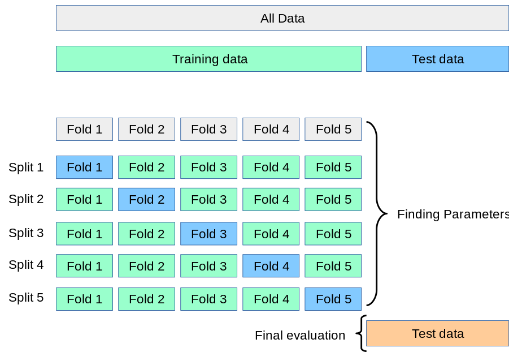

In [8]:
# StratifiedKFold k = 5
skf = StratifiedKFold(n_splits=5, 
                      shuffle=True, 
                      random_state=seed)
for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index,  "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

TRAIN: [    0     1     2 ... 16371 16373 16374] TEST: [   11    12    17 ... 16370 16372 16375]
TRAIN: [    0     1     4 ... 16371 16372 16375] TEST: [    2     3     5 ... 16368 16373 16374]
TRAIN: [    0     2     3 ... 16373 16374 16375] TEST: [    1     4    10 ... 16352 16365 16371]
TRAIN: [    0     1     2 ... 16373 16374 16375] TEST: [    6    13    16 ... 16361 16363 16367]
TRAIN: [    1     2     3 ... 16373 16374 16375] TEST: [    0     7     9 ... 16360 16364 16366]


In [9]:
X_train.shape

(13101, 26)

In [10]:
X_test.shape

(3275, 26)

In [11]:
Y_train.shape

(13101,)

In [12]:
Y_test.shape

(3275,)

* Modelos Machine Learning

* Suport Vector Machine (svm)
<h6>gama :</h6> 
{'scale', 'auto'} ou float, default='scale', Coeficiente de kernel para 'rbf', 'poli' e 'sigmoid'. Se gamma='scale'(padrão) for passado, ele usará 1 / (n_features * X.var()) como valor de gama, se 'auto', usa 1 / n_features.
<h6>probabilidade :</h6>
Se deve habilitar estimativas de probabilidade. Isso deve ser ativado antes de chamar fit, diminuirá a velocidade desse método, pois ele usa internamente validação cruzada de 5 vezes e predict_probapode ser inconsistente com predict.
<h6>random_state :</h6>
Controla a geração de números pseudoaleatórios para embaralhar os dados para estimativas de probabilidade. Ignorado quando probabilityé False. Passe um int para saída reproduzível em várias chamadas de função.

* O Support Vector Machines (svm) que escolhe o limite de decisão que maximiza a distância dos pontos de dados mais próximos de todas as classes, ou seja, o limite de decisão mais ótimo, o limite ótimo tem margem máxima dos pontos mais próximos de todas as classes, a distância entre o limite de decisão e os pontos são chamados de vetores de suporte, como visto na Figura abaixo:

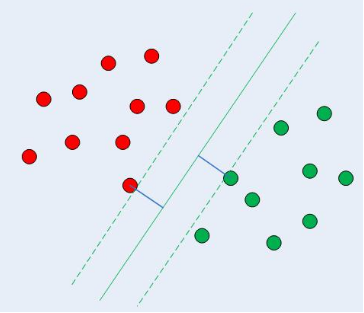

* Gaussian Naive Bayes (gnb)

* O modelo Gaussian Naive Bayes (gnb), não definimos nenhum parâmetro, o modelo irá utilizar os parâmetros default, conforme definido na Figura abaixo:

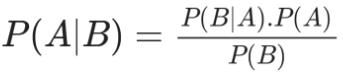

* RandomForestClassifier (rfc)
<h6> n_estimators :</h6>
Número inteiro, opcional (padrão = 100). O número de árvores na floresta.
<h6>random_state :</h6> 
Int, instância RandomState ou None, opcional (padrão = None). Se int, random_state é a semente usada pelo gerador de números aleatórios; Se a instância RandomState, random_state for o gerador de números aleatórios; Se Nenhum, o gerador de números aleatórios é a instância RandomState usada por np.random.

* RandomForestClassifier (rfc) é um meta-estimador que se encaixa em vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo.

In [13]:
clfs={

    'svm': SVC(gamma='auto', probability=True, random_state=seed),
    
    'gnb': GaussianNB(),
    
    'rfc': RandomForestClassifier(n_estimators=100, random_state=seed),
        
}

* Métricas de avaliação Machine Learning

In [14]:
accuracy_scores=dict()
precision_scores=dict()
recall_scores=dict()
f1_scores=dict()
aucs=dict()
for clf_name in clfs:
    print(clf_name)
    clf=clfs[clf_name]
    clf.fit(X_train, Y_train)
    # Modelos prevendo os valores para o conjunto de teste
    Y_pred=clf.predict(X_test)
    # Prever as probabilidades de classe para o conjunto de teste
    Y_score=clf.predict_proba(X_test)[:, 1]
    accuracy_scores[clf_name]=accuracy_score(Y_test, Y_pred)
    precision_scores[clf_name]=precision_score(Y_test, Y_pred)
    recall_scores[clf_name]=recall_score(Y_test, Y_pred)
    f1_scores[clf_name]=f1_score(Y_test, Y_pred)
    aucs[clf_name]=roc_auc_score(Y_test, Y_score)

svm
gnb
rfc


<h6>Acurácia (accuracy_score) :</h6>
Acurácia (accuracy_score) é o indicador mais simples de se calcular. Ele é simplesmente a divisão entre todos os acertos pelo total.

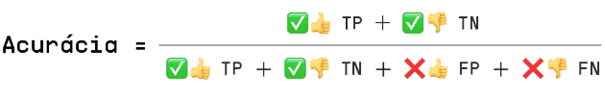

In [15]:
accuracy_scores

{'svm': 0.7114503816793893,
 'gnb': 0.6665648854961832,
 'rfc': 0.7261068702290077}

<h6>Precisão (precision_score) :</h6>
Precisão (precision_score) é o número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe (positivos verdadeiros), dividido pela soma entre este número, e o número de exemplos classificados nesta classe, mas que pertencem a outras (falsos positivos).

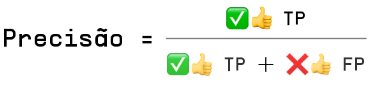

In [16]:
precision_scores

{'svm': 0.5339805825242718,
 'gnb': 0.4303097345132743,
 'rfc': 0.5775280898876405}

<h6>Revocação (recall_score) :</h6>
Revocação (recall_score) é o número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencem a esta classe, mesmo que sejam classificados em outra. No caso binário, positivos verdadeiros divididos por total de positivos.

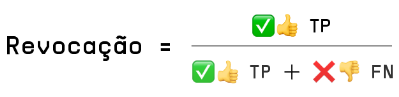

In [17]:
recall_scores

{'svm': 0.17080745341614906,
 'gnb': 0.4026915113871636,
 'rfc': 0.2660455486542443}

<h6>F1 (f1_score) :</h6>
F1-score (f1_score) é uma média harmônica entre precisão (que, apesar de ter o mesmo nome, não é a mesma citada acima) e recall. Veja abaixo as definições destes dois termos. Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades. Isso não significa que não possa ser usada com modelos que emitem probabilidades, tudo depende do objetivo de sua tarefa de machine learning. Em geral, quanto maior o F1-score, melhor.

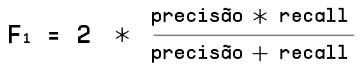

In [18]:
f1_scores

{'svm': 0.25882352941176473,
 'gnb': 0.4160427807486631,
 'rfc': 0.36428065201984405}

<h6>AUC (roc_auc_score) :</h6>
AUC (roc_auc_score) é uma métrica interessante para tarefas com classes desproporcionais. Nela, mede-se a área sob uma curva formada pelo gráfico entre a taxa de exemplos positivos, que realmente são positivos, e a taxa de falsos positivos.

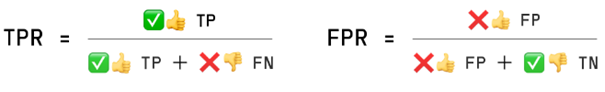

In [19]:
aucs

{'svm': 0.6593117937102724,
 'gnb': 0.6352193729281495,
 'rfc': 0.6947366816498945}

* Tuning Models GridSearchCV

* GridSearchCV e Suport Vector Machine

* Suport Vector Machine (svm)
<h6>C :</h6>
Flutuante, padrão = 1,0, parâmetro de regularização. A força da regularização é inversamente proporcional a C. Deve ser estritamente positiva. A penalidade é uma penalidade de 12 ao quadrado.
<h6>gama :</h6> 
{'scale', 'auto'} ou float, default='scale', Coeficiente de kernel para 'rbf', 'poli' e 'sigmoid'. Se gamma='scale'(padrão) for passado, ele usará 1 / (n_features * X.var()) como valor de gama, se 'auto', usa 1 / n_features.
<h6>kernel :</h6>
{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} ou callable, default='rbf, especifica o tipo de kernel a ser usado no algoritmo. Se nenhum for fornecido, 'rbf' será usado. Se um callable for fornecido, ele será usado para pré-computar a matriz do kernel a partir de matrizes de dados; essa matriz deve ser uma matriz de tamanho (n_samples, n_samples).

In [20]:
# Best parameters grid
param_grid_svm={
    'C': [0.1, 1, 10, 100], 
    'gamma': [1,0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

In [21]:
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
svm=SVC(gamma='auto', random_state=seed)
svm=svm.fit(X_train, Y_train)

# Best parameters SVM
gs_svm=GridSearchCV(estimator=svm, param_grid=param_grid_svm, scoring='recall', 
                      verbose=10, n_jobs=-1)
gs_svm=gs_svm.fit(X_train, Y_train)
best_parameters=gs_svm.best_params_
print("The best parameters for using this model SVM is", best_parameters)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
The best parameters for using this model SVM is {'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}


* GridSearchCV e Gaussian Naive Bayes

* Gaussian Naive Bayes (gnb)
<h6>var_smoothing :</h6>
Float, default=1e-9, parte da maior variância de todos os recursos que é adicionada às variâncias para estabilidade de cálculo.

In [22]:
# Best parameters grid
param_grid_gnb={ 
    'var_smoothing': np.logspace(0,-9, num=100) 
}

In [23]:
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
gnb=GaussianNB ()
gnb=gnb.fit(X_train, Y_train)

# Best parameters GNB
gs_gnb=GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, scoring='recall', 
                      verbose=10, n_jobs=-1)
gs_gnb=gs_gnb.fit(X_train, Y_train)
best_parameters=gs_gnb.best_params_
print("The best parameters for using this model GNB is", best_parameters)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters for using this model GNB is {'var_smoothing': 5.3366992312063123e-05}


* GridSearchCV e RandomForestClassifier

<h6>n_estimators :</h6> 
Número inteiro, opcional (padrão = 100). O número de árvores na floresta.

<h6>max_features :</h6> 
Int, float, string ou None, opcional (padrão = "auto"). O número de recursos a serem considerados ao procurar a melhor divisão: Se int, considere os max_featuresrecursos em cada divisão. Se float, então max_featuresé uma fração e os recursos são considerados em cada divisão. Int(max_features * n_features). Se "auto", então max_features=sqrt(n_features). Se "sqrt", então max_features=sqrt(n_features)(o mesmo que "auto"). Se "log2", então max_features=log2(n_features). Se Nenhum, então max_features=n_features.
Nota: a procura de uma divisão não é interrompida até que pelo menos uma partição válida das amostras de nós seja encontrada, mesmo que exija inspecionar efetivamente mais do que max_features recursos.

<h6>min_samples_leaf :</h6>
Int, float, opcional (padrão = 1). O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos min_samples_leafamostras de treinamento em cada um dos ramos esquerdo e direito. Isso pode ter o efeito de suavizar o modelo, especialmente em regressão. Se int, considere min_samples_leafcomo o número mínimo. Se float, então min_samples_leafé uma fração e é o número mínimo de amostras para cada nó (min_samples_leaf * n_samples).

<h6>min_samples_split :</h6> 
Int, float, opcional (padrão = 2). O número mínimo de amostras necessárias para dividir um nó interno: Se int, considere min_samples_splitcomo o número mínimo. Se flutuar, então min_samples_splité uma fração e é o número mínimo de amostras para cada divisão (min_samples_split * n_samples).

<h6>max_depth :</h6> 
Int, default=Nenhum. A profundidade máxima da árvore. Se Nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos de min_samples_split amostras.

<h6>critério :</h6> 
String, opcional (padrão = ”gini”). A função para medir a qualidade de uma divisão. Os critérios suportados são "gini" para a impureza de Gini e "entropia" para o ganho de informações. Nota: este parâmetro é específico da árvore.

<h6>class_weight :</h6> 
Dict, lista de dict, "equilibrado", "balanced_subsample" ou Nenhum, opcional (padrão = Nenhum). Pesos associados às classes no formulário . Se não for dada, todas as classes devem ter um peso. Para problemas de várias saídas, uma lista de ditados pode ser fornecida na mesma ordem que as colunas de y.{class_label: weight}. Observe que para pesos de saída múltipla (incluindo várias etiquetas) deve ser definido para cada classe de cada coluna em seu próprio ditado. Por exemplo, para pesos de classificação multilabel de quatro classes deve ser [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] em vez de [{1: 1}, {2: 5}, {3: 1}, {4: 1}]. O modo "balanceado" usa os valores de y para ajustar automaticamente pesos inversamente proporcionais às frequências de classe nos dados de entrada, conforme n_samples / (n_classes * np.bincount(y)). O modo "balance_subsple" é o mesmo que "balance", exceto que os pesos são calculados com base na amostra de autoinicialização para cada árvore cultivada. Para saída múltipla, os pesos de cada coluna de y serão multiplicados. Observe que esses pesos serão multiplicados com sample_weight (passado pelo método de ajuste) se sample_weight for especificado.

<h6>n_jobs :</h6> 
Int ou None, opcional (padrão = None). O número de tarefas a serem executadas em paralelo para ambos fite predict. Nonesignifica 1, a menos que esteja em um joblib.parallel_backendcontexto. -1significa usar todos os processadores. Veja o Glossário para mais detalhes.

<h6>random_state :</h6> 
Int, instância RandomState ou None, opcional (padrão = None). Se int, random_state é a semente usada pelo gerador de números aleatórios; Se a instância RandomState, random_state for o gerador de números aleatórios; Se Nenhum, o gerador de números aleatórios é a instância RandomState usada por np.random.

In [24]:
# Best parameters grid
param_grid_rfc={
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [25]:
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
rfc=RandomForestClassifier (n_estimators=100, random_state=seed)
rfc=rfc.fit(X_train, Y_train)

# Best parameters RFC
gs_rfc=GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring='recall', 
                      verbose=10, n_jobs=-1)
gs_rfc=gs_rfc.fit(X_train, Y_train)
best_parameters = gs_rfc.best_params_
print("The best parameters for using this model RFC is", best_parameters)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
The best parameters for using this model RFC is {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


* Os melhores parâmetros segundo tuning GridSearchCV para usar esses modelos

In [21]:
clfs={

    'svm_best_param': SVC(C=100, gamma=1, kernel='sigmoid', probability=True, random_state=seed),
    
    'gnb_best_param': GaussianNB(var_smoothing=5.3366992312063123e-05),
    
    'rfc_best_param': RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy', 
                                             max_depth=5, max_features='log2', min_samples_leaf=2, 
                                             min_samples_split=5, n_estimators=200, random_state=seed, 
                                             n_jobs=-1),
        
    
}

* Métricas de avaliação Machine Learning com os melhores parâmetros para usar esses modelos

In [22]:
accuracy_scores=dict()
precision_scores=dict()
recall_scores=dict()
f1_scores=dict()
aucs=dict() 
for clf_name in clfs:
    print(clf_name)
    clf=clfs[clf_name]
    clf.fit(X_train, Y_train)
    # Modelos prevendo os valores para o conjunto de teste
    Y_pred=clf.predict(X_test)
    # Prever as probabilidades de classe para o conjunto de teste
    Y_score=clf.predict_proba(X_test)[:, 1]
    accuracy_scores[clf_name]=accuracy_score(Y_test, Y_pred)
    precision_scores[clf_name]=precision_score(Y_test, Y_pred)
    recall_scores[clf_name]=recall_score(Y_test, Y_pred)
    f1_scores[clf_name]=f1_score(Y_test, Y_pred)
    aucs[clf_name]=roc_auc_score(Y_test, Y_score)

svm_best_param
gnb_best_param
rfc_best_param


In [23]:
accuracy_scores

{'svm_best_param': 0.636030534351145,
 'gnb_best_param': 0.6665648854961832,
 'rfc_best_param': 0.6516030534351145}

In [24]:
precision_scores

{'svm_best_param': 0.37901498929336186,
 'gnb_best_param': 0.43,
 'rfc_best_param': 0.4417055296469021}

In [25]:
recall_scores

{'svm_best_param': 0.36645962732919257,
 'gnb_best_param': 0.40062111801242234,
 'rfc_best_param': 0.6863354037267081}

In [26]:
f1_scores

{'svm_best_param': 0.37263157894736837,
 'gnb_best_param': 0.41479099678456594,
 'rfc_best_param': 0.5374949331171464}

In [27]:
aucs

{'svm_best_param': 0.4351556202348,
 'gnb_best_param': 0.6349678591379309,
 'rfc_best_param': 0.7075544699963328}

* Plote curva ROC (plot_roc_curve) - Aprendizado do modelo Suport Vector Machine Tuning

In [28]:
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
svm=SVC(C=100, gamma=1, kernel='sigmoid', probability=True, random_state=seed)
svm=svm.fit(X_train, Y_train)

# Modelo prevendo os valores para o conjunto de teste
Y_pred=svm.predict(X_test)

# Prever as probabilidades de classe para o conjunto de teste
Y_score=svm.predict_proba(X_test)[:, 1]

* Plote ROC curve SVM

Plot ROC curve SVM


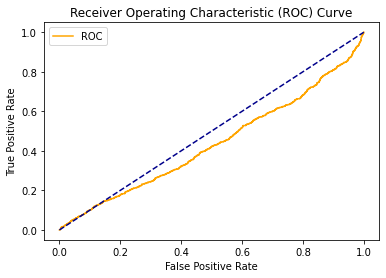

AUC: 0.44
A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1.


In [29]:
# ROC curve
print('Plot ROC curve SVM')
fpr_svm, tpr_svm, thresholds_svm=roc_curve(Y_test, Y_score)
plot_roc_curve(fpr_svm, tpr_svm)
auc = roc_auc_score(Y_test, Y_score)
print('AUC: %.2f' % auc)
print('A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1.')

* Plote curva ROC (plot_roc_curve) - Aprendizado do modelo Gaussian Naive Bayes Tuning

In [30]:
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
gnb=GaussianNB (var_smoothing=5.3366992312063123e-05)
gnb=gnb.fit(X_train, Y_train)

# Modelo prevendo os valores para o conjunto de teste
Y_pred=gnb.predict(X_test)

# Prever as probabilidades de classe para o conjunto de teste
Y_score=gnb.predict_proba(X_test)[:, 1]

* Plote ROC curve GNB

Plot ROC curve GNB


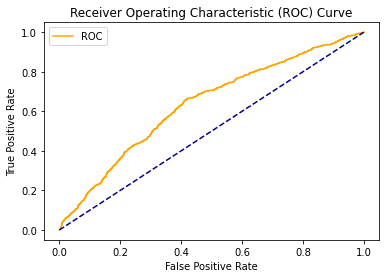

AUC: 0.63
A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1.


In [31]:
# ROC curve
print('Plot ROC curve GNB')
fpr_gnb, tpr_gnb, thresholds_gnb=roc_curve(Y_test, Y_score)
plot_roc_curve(fpr_gnb, tpr_gnb)
auc = roc_auc_score(Y_test, Y_score)
print('AUC: %.2f' % auc)
print('A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1.')

* RandomForestClassifier, aprendizado do mmodelo que manteve o melhor resultado no tuning de parâmetros 

In [41]:
%%timeit
# Ajustar o modelo usando X como dados de treinamento e y como valores de destino
rfc=RandomForestClassifier (class_weight='balanced_subsample', criterion='entropy', 
                            max_depth=5, max_features='log2', min_samples_leaf=2, 
                            min_samples_split=5, n_estimators=200, random_state=seed, 
                            n_jobs=-1)
rfc=rfc.fit(X_train, Y_train)

# Modelo prevendo os valores para o conjunto de teste
Y_pred=rfc.predict(X_test)

# Prever as probabilidades de classe para o conjunto de teste
Y_score=rfc.predict_proba(X_test)[:, 1]

528 ms ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


* Matriz de confusão (confusion_matrix)

In [36]:
# Matriz de confusão
print("Confusion matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion matrix:
[[1471  838]
 [ 303  663]]


* Relatório de classificação (classification_report)

In [37]:
# Reportar para outras medidas de classificação
print("Classification report:")
print(classification_report(Y_test, Y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      2309
           1       0.44      0.69      0.54       966

    accuracy                           0.65      3275
   macro avg       0.64      0.66      0.63      3275
weighted avg       0.71      0.65      0.67      3275



* Plote curva ROC (plot_roc_curve) - Aprendizado do modelo RandomForestClassifier

Plot ROC curve RFC


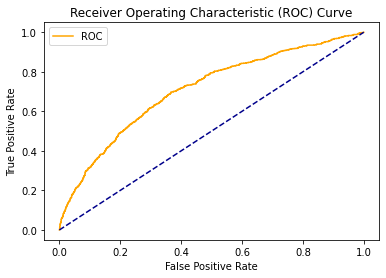

AUC: 0.71
A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1.


In [38]:
# ROC curve
print('Plot ROC curve RFC')
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(Y_test, Y_score)
plot_roc_curve(fpr_rfc, tpr_rfc)
auc = roc_auc_score(Y_test, Y_score)
print('AUC: %.2f' % auc)
print('A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1.')

* Variáveis preditoras
* Plote feature importance

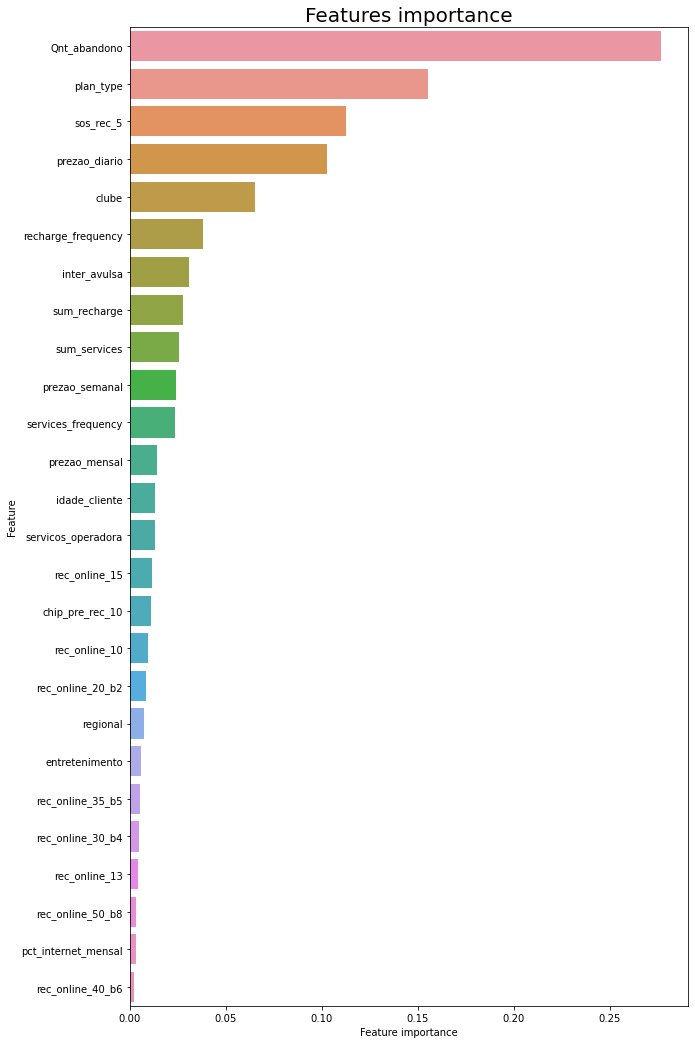

In [39]:
# Variaveis preditoras
predictors=['regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
            'sum_recharge', 'recharge_frequency', 'rec_online_10',
            'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
            'chip_pre_rec_10', 'rec_online_13', 'rec_online_50_b8',
            'rec_online_30_b4', 'rec_online_40_b6', 'sum_services',
            'services_frequency', 'inter_avulsa', 'clube', 'entretenimento',
            'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
            'prezao_semanal', 'servicos_operadora']

# Plote feature importance
plot_feature_importance(rfc)

* Plote compare ROC Curve (all models) - Aprendizado dos modelos

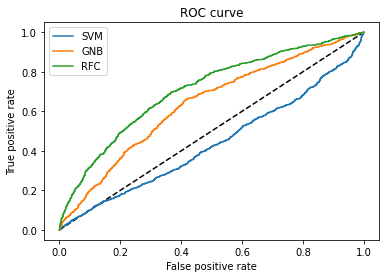

In [40]:
# Plote compare ROC Curve (all models) - Aprendizado dos modelos
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_gnb, tpr_gnb, label='GNB')
plt.plot(fpr_rfc, tpr_rfc, label='RFC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

* A área coberta pela curva é a área entre a linha laranja (ROC) e o eixo. Esta área coberta é AUC. Quanto maior a área coberta, melhor os modelos de aprendizado de máquina distinguem as classes dadas. O valor ideal para AUC é 1 e AUC, o SVM está com valor 0.44, GNB com 0.63 e o RFC é de 0.71. 

* O RandomForestClassifier é o classificador que chega mais próximo de um bom classificador para o nosso estudo.
